In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict,Annotated
from dotenv import load_dotenv
import os
from pydantic import BaseModel, Field
import operator
from typing import Literal
from langgraph.graph.message import add_messages
from langchain_core.messages import SystemMessage, HumanMessage , BaseMessage
from langgraph.checkpoint.memory import MemorySaver

In [3]:
Api_key = os.getenv("OPENAI_API_KEY")
model = ChatOpenAI(
    model="openai/gpt-4o-mini",
    base_url="https://openrouter.ai/api/v1",
    api_key= Api_key
)

In [4]:
class Chatbot(TypedDict):
    message : Annotated[list[BaseMessage],add_messages]

In [5]:
def chat_node(state : Chatbot):
    message = state['message']

    response = model.invoke(message)

    return{
        "message" : response
    }

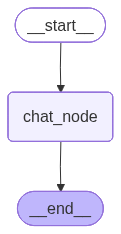

In [6]:
checkpointer = MemorySaver()
graph = StateGraph(Chatbot)

graph.add_node("chat_node",chat_node)

graph.add_edge(START,"chat_node")
graph.add_edge("chat_node",END)

chatbot = graph.compile(checkpointer=checkpointer)
chatbot

In [ ]:
thread_id = "1"
while True:
    user_message = input("Type here : ")
    print("User : " , user_message)
    if user_message.strip().lower() in ["exit","quit"]:
        break
    config = {
        "configurable" : {
            "thread_id" : thread_id
        }
    }
    response = chatbot.invoke({
        "message" : [HumanMessage(content=user_message)]
    },config=config)
    print("AI : ", response["message"][-1].content)

User :  my name is bulla 
AI :  Nice to meet you, Bulla! How can I assist you today?
User :  khata hoon mai gulla
AI :  Ye dosti ka andaaz hai! Aapne toh mazak ka mazaa hi badha diya. Aap kya kar rahe hain aaj kal?
User :  mai ajkal kli har jagah flop aur haar raha hoon and i am celebrating kar raha hoon isko 
AI :  Yeh toh badi interesting approach hai! Har haar se kuch naya seekhne ko milta hai, aur celebrate karna toh ek achhi mental attitude hai. Kabhi kabhi life ke flop moments hi humein aage badhne ki motivation dete hain. Aapko kya lagta hai, inse aapne kya seekha?
User :  mujhe yaad nhi
AI :  Koi baat nahi! Kabhi kabhi humare experiences yaad rehne se zyada important woh emotions hote hain jo unse judi hote hain. Aap abhi kya soch rahe hain ya kya karne ka plan hai?
User :  exir
AI :  Aap "exir" ka kya matlab samajhna chahte hain? Kya aap kisi specific topic ya concept ke baare mein baat kar rahe hain? Thoda aur clarity denge toh main behtar madad kar paunga!
User :  exit


In [10]:
chatbot.get_state(config=config)

StateSnapshot(values={'message': [HumanMessage(content='my name is bulla ', additional_kwargs={}, response_metadata={}, id='56db8ac4-ef6e-44fe-8642-083d5ba0759d'), AIMessage(content='Nice to meet you, Bulla! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 13, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 1.095e-05, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 1.95e-06, 'upstream_inference_completions_cost': 9e-06}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-4o-mini', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'gen-1767984671-EB8sjAtPQLXbkJSxtW6j', 'finish_reason': 'stop', 'logprobs': None}, i

In [14]:
list(chatbot.get_state_history(config=config))

[StateSnapshot(values={'message': [HumanMessage(content='my name is bulla ', additional_kwargs={}, response_metadata={}, id='56db8ac4-ef6e-44fe-8642-083d5ba0759d'), AIMessage(content='Nice to meet you, Bulla! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 13, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 1.095e-05, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 1.95e-06, 'upstream_inference_completions_cost': 9e-06}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-4o-mini', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'gen-1767984671-EB8sjAtPQLXbkJSxtW6j', 'finish_reason': 'stop', 'logprobs': None}, 